# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2025/)    
## 1MS041, 2025 
&copy;2025 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Generating random variables in different forms

In [5]:
from Utils import linConGen
import numpy as np
import matplotlib.pyplot as plt
from Utils import discrete_histogram

In [7]:
a,b,m = (1103515245,12345,2**32) # This is the ANSI C LCG
seed = 1
np.array(linConGen(m,a,b,seed,10))/m

array([2.32830644e-10, 2.56935039e-01, 5.87870652e-01, 1.54325758e-01,
       7.67266943e-01, 9.73813963e-01, 5.85868151e-01, 8.51115584e-01,
       6.13215341e-01, 7.47386723e-01])

In [8]:
def random():
    """Generates one random sample from the uniform [0,1] distribution"""
    global seed
    seed = linConGen(m,a,b,seed,2)[1]
    return seed/m

In [99]:
unif_x = [random() for i in range(10000)]

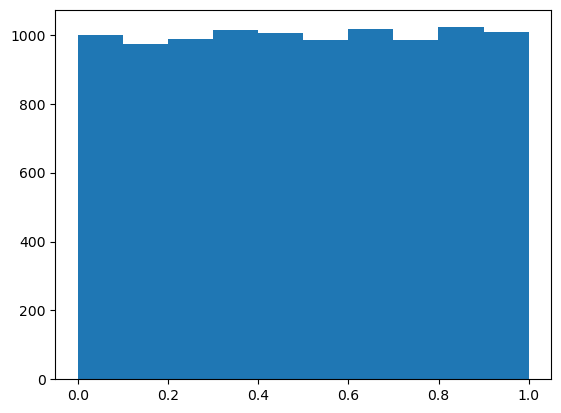

In [100]:
_=plt.hist(unif_x,bins=10)

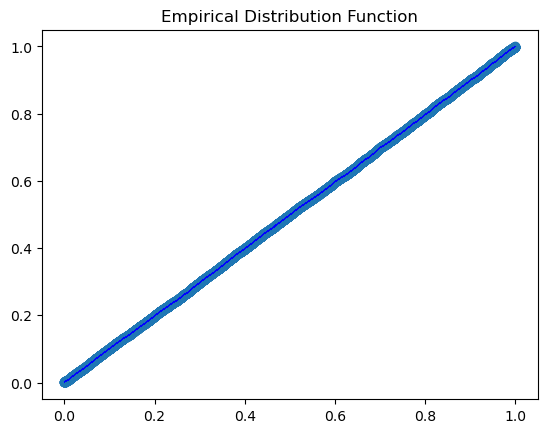

In [101]:
from Utils import makeEDF,plotEDF
plotEDF(makeEDF(unif_x))

Lets say that $F(x) = 1-e^{-\lambda x}$,
$$
    F(x) = y \quad x = -\frac{1}{\lambda} \ln(1-y)
$$

In [102]:
X = -np.log(1-np.array(unif_x))

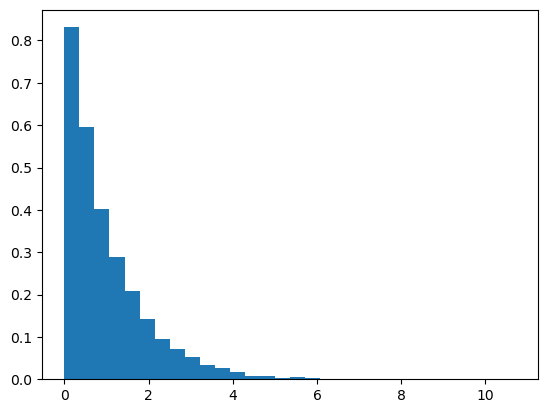

In [103]:
_=plt.hist(X,bins=30,density=True)

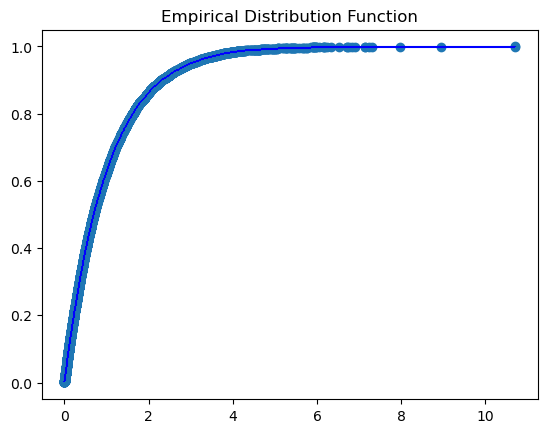

In [104]:
plotEDF(makeEDF(X))

## Generating Bernoulli rv.s

In [105]:
# floor function return the largest integer less than or equal to the given number(doesn't round off!)

def unif_to_bernoulli(x,p):
    from math import floor
    return floor(x+p)

In [106]:
bernoulli_x = [unif_to_bernoulli(random(),0.9) for i in range(1000)]

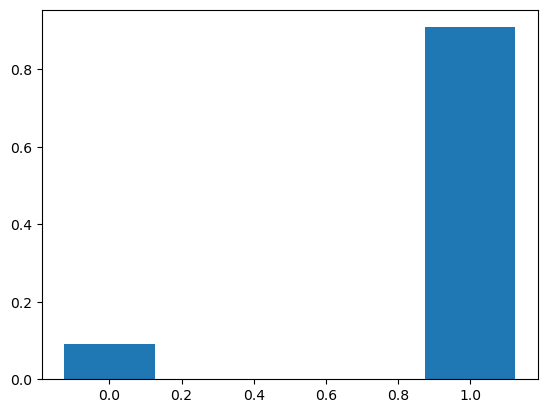

In [107]:
discrete_histogram(bernoulli_x,normed=True)

## Generating integers with different probabilites

In [108]:
import numpy as np

In [109]:
p = np.array([0.1,0.2,0.5,0.2])

In [110]:
p_cumsum = np.cumsum(p)

In [111]:
p_cumsum

array([0.1, 0.3, 0.8, 1. ])

In [112]:
uniform_x = np.array([random() for i in range(1000)])
#np.argmax(uniform_x-p_cumsum,)

In [113]:
xp = (uniform_x.reshape(-1,1)-p_cumsum.reshape(1,-1)) # (10000,1), (1,4) -> (10000,4)
xp.shape

(1000, 4)

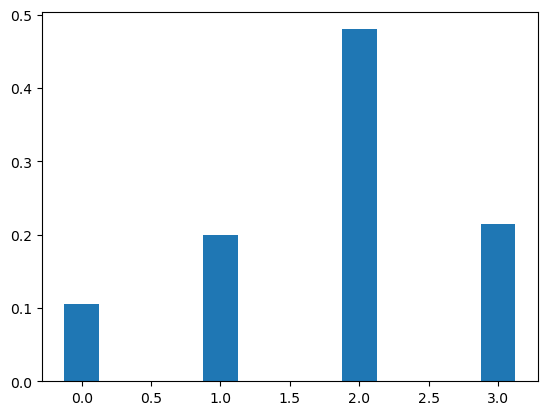

In [114]:
from Utils import discrete_histogram
discrete_histogram(np.argmax(xp <= 0,axis=1),normed=True)

## Shuffling an array

```-- To shuffle an array a of n elements (indices 0..n-1):
for i from n−1 downto 1 do
     j ← random integer such that 0 ≤ j ≤ i
     exchange a[j] and a[i]```

$$
    F^{-1} (y) = \min\{x: F(x) \geq y\}
$$

In [26]:
def randint(b):
    """Producing random integers between 0 and b inclusive"""
    u = random()
    from math import floor
    return floor(u*(b+1))

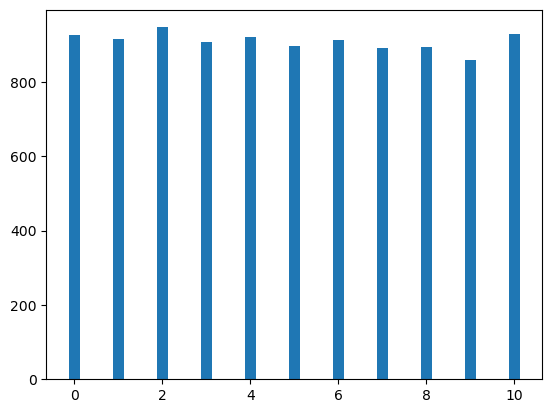

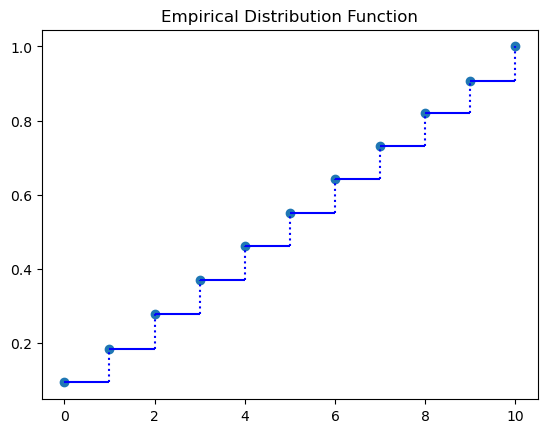

In [116]:
from Utils import plotEDF,makeEDF
random_samples_int = [randint(10) for i in range(10000)]
discrete_histogram(random_samples_int)
plotEDF(makeEDF(random_samples_int))

In [117]:
arr = np.arange(0,100)
n = len(arr)
for i in range(n-1,0,-1):
    j = randint(i) # Random integer between 0 and i inclusive
    tmp = arr[j]
    arr[j] = arr[i]
    arr[i] = tmp

In [118]:
arr

array([67, 90, 54, 74, 22, 53, 47, 26, 25, 35, 21,  1, 56, 17, 15, 69, 71,
       31, 98, 75, 11, 65, 85, 79, 59, 68,  9, 46,  2,  6, 58, 61,  3, 95,
        8, 91, 86, 18, 27, 38, 51, 43, 29, 23, 37, 41, 42, 78, 73, 83, 99,
       45, 62, 28, 76, 10,  5, 80, 89, 87, 92, 44, 72,  7, 16, 33, 64, 93,
        4, 34, 88, 19, 14,  0, 82, 13, 60, 94, 97, 63, 52, 96, 48, 81, 77,
       49, 57, 24, 66, 70, 20, 32, 84, 39, 36, 30, 55, 12, 50, 40])

In [24]:
def random_shuffle(arr):
    """Shuffles an array in place"""
    n = len(arr)
    for i in range(n-1,0,-1):
        j = randint(i) # Random integer between 0 and i inclusive
        tmp = arr[j]
        arr[j] = arr[i]
        arr[i] = tmp
    return arr

In [120]:
aa = np.arange(10)
random_shuffle(aa)
aa

array([1, 0, 5, 9, 2, 4, 7, 8, 3, 6])

In [121]:
from sklearn.datasets import make_classification
X,y = make_classification()

In [122]:
index = np.arange(0,len(y))
random_shuffle(index)
X_shuffle = X[index,:]
y_shuffle = y[index]

## Permutation testing
See chapter 10 in All of Statistics

In [16]:
from math import floor
import numpy as np
X = np.array([floor(random()+0.5) for i in range(100)])
Y = np.array([floor(random()+0.2) for i in range(100)])
XY = np.concatenate([X,Y])

In [21]:
def compute_diff(arr):
    return np.abs(np.mean(arr[:100])-np.mean(arr[100:]))

In [22]:
compute_diff(XY)

np.float64(0.29000000000000004)

In [27]:
differences = np.array([compute_diff(random_shuffle(XY)) for i in range(10000)])

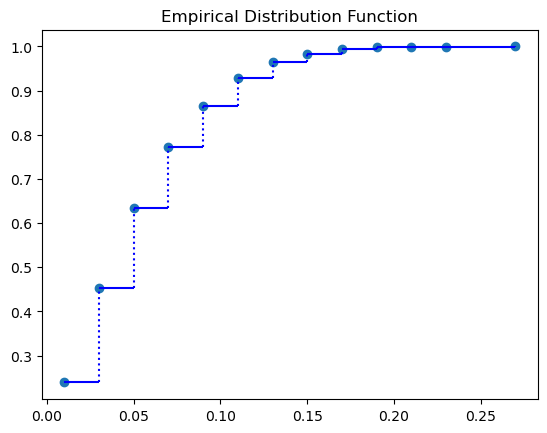

In [28]:
from Utils import plotEDF,makeEDF
plotEDF(makeEDF(differences))

## Box Muller

Suppose that $U_1,U_2 \overset{\text{IID}}{\sim} \text{Uniform}([0,1])$, then
\begin{align*}
    Z_0 &= \sqrt{-2\ln(U_1)} \cos(2\pi U_2) \\
    Z_1 &= \sqrt{-2\ln(U_1)} \sin(2\pi U_2) \\
\end{align*}
are independent random variables, and $Z_0,Z_1 \sim \mathcal{N}(0,1)$.

In [128]:
uniform_sequence = np.array([random() for i in range(10000)])
re_unif = uniform_sequence.reshape(-1,2)
Z1 = np.sqrt(-2*np.log(re_unif[:,0]))*np.cos(2*np.pi*re_unif[:,1])
Z2 = np.sqrt(-2*np.log(re_unif[:,0]))*np.sin(2*np.pi*re_unif[:,1])
Z = np.column_stack([Z1,Z2])

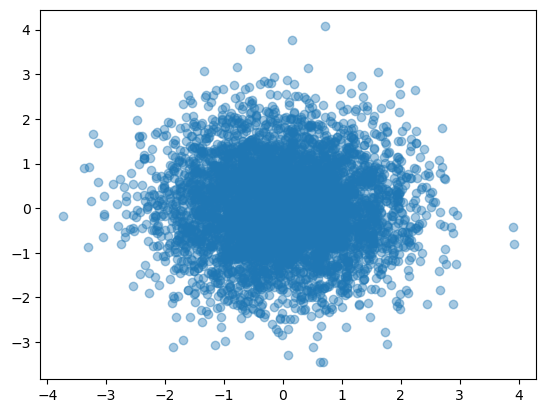

In [129]:
import matplotlib.pyplot as plt
plt.scatter(Z1,Z2,alpha=0.4)

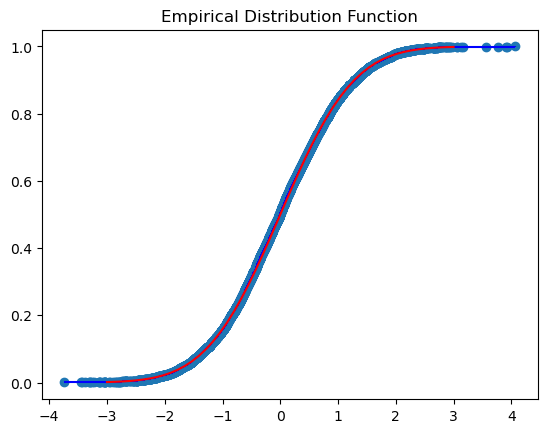

In [130]:
from Utils import makeEDF,plotEDF
from scipy.stats import norm
x_plot = np.linspace(-3,3)
plotEDF(makeEDF(Z.flatten()),force_display=False)
plt.plot(x_plot,norm.cdf(x_plot),color='red')

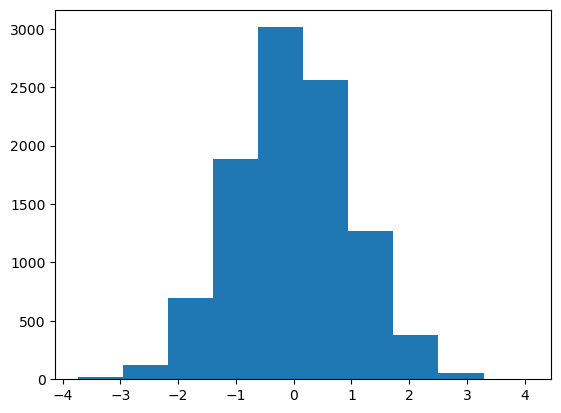

In [131]:
_=plt.hist(Z.flatten())

## Rejection sampling


1. input
    * a target density $f(x)$
    * a sampling density $g(x)$ that satisfies $f(x) \leq M g(x)$
2. output: a sequence of samples $x_0, \ldots$ with distribution $f$

1. Sample initial state $X^{(0)}$ from $g$

**REPEAT**
1.  At iteration $t$,
2.  Generate $x$ from $g$ and compute the ratio $r(x) = \frac{f(x)}{Mg(x)}$
3.  Draw $U \sim \text{uniform}([0,1])$ and set $X^{{t+1}} = x$, if $U \leq r(x)$, otherwise goto 2?

**UNTIL** desired number of samples are obtained.

Let us sample from the uniform distribution on the unit disk, our proposal distribution can be taken to be the uniform distribution on the 2-square. The area of the disk is $r^2 \pi$, i.e. the density $f$ should be $1/\pi$ on the circle and 0 elsewhere. The 2-square has area $4$ so the density of $g = 1/4$, we thus need $M = 4/\pi$

In [30]:
# samples = []

# (PDF for sampling)f = 1/pie at inside circle else 0 with area pie r square

# proposal area = 2x2 = 4 (a square with an area of 4 and side 2 where points are taken in uniform distribution)
# pdf of proposal area = 1/4 (unit area = favorable outcome)


# target area = area pie r square of disk with r from 0 -> 1
# target density = rsquare / pie*rsquare (pie rsquare is overall area given out of which unit disk favourable)

# M >= 1/pie * 4 

# M = 4/ pie 

# 1/pie
# ---------
# 4/pie * 1/4

# becomes our ratio which is 1

# now we generate 
#     (X1,X2) = (2*random()-1,2*random()-1) we convert the range from [0,1) to [-1,1]for X1 and X2.













In [132]:
samples = []
rejections = 0
while (len(samples) < 100000):
    # We know that the ratio is 1 when x is in the circle and 0 if it is outside
    (X1,X2) = (2*random()-1,2*random()-1)
    if (np.linalg.norm([X1,X2]) <= 1): # We are inside the circle
        samples.append((X1,X2))
    else:
        rejections+=1

In [133]:
100000/(100000+rejections)

0.785638527713399

In [134]:
np.pi/4

0.7853981633974483

In [135]:
samp_arr = np.array(samples)

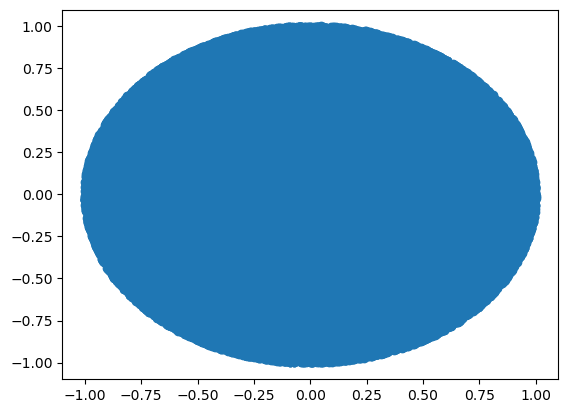

In [136]:
plt.scatter(samp_arr[:,0],samp_arr[:,1])

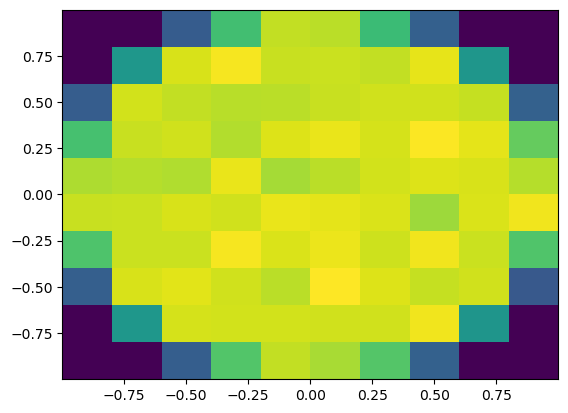

In [137]:
_=plt.hist2d(samp_arr[:,0],samp_arr[:,1])

In [138]:
f = np.array([0.1,0.2,0.5,0.2])
g = np.array([1/4,1/4,1/4,1/4])
M = 2
f-M*g

array([-0.4, -0.3,  0. , -0.3])

In [139]:
samples = []

r = f/(M*g)
rejections = 0
while (len(samples) < 10000):
    x = randint(3)
    #r[x]
    U = random()
    if (U <= r[x]):
        samples.append(x)
    else:
        rejections+=1


In [140]:
rejections/(10000+rejections)

0.5003747189607795

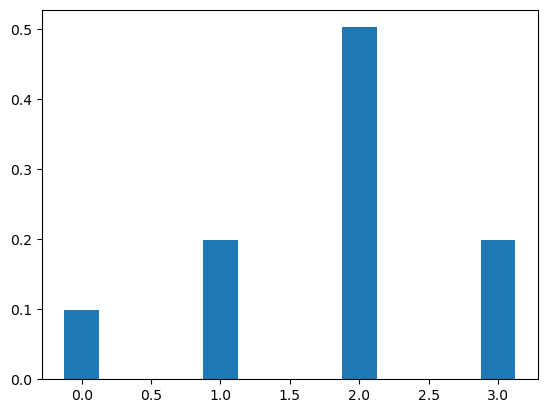

In [141]:
discrete_histogram(samples,normed=True)

In [142]:
f

array([0.1, 0.2, 0.5, 0.2])

## Sampling from the Poisson

The Poisson has distribution function
$$
    F(x) = e^{-\lambda} \sum_{j=0}^{\lfloor x \rfloor} \frac{\lambda^j}{j!}
$$  


In [143]:
def sample_poisson():
    from scipy.special import factorial
    Y = random()
    l = 2

    F = 0
    for i in range(1000):
        F = F + np.exp(-l)*np.power(l,i)/factorial(i)
        if (F > Y):
            break
    return i

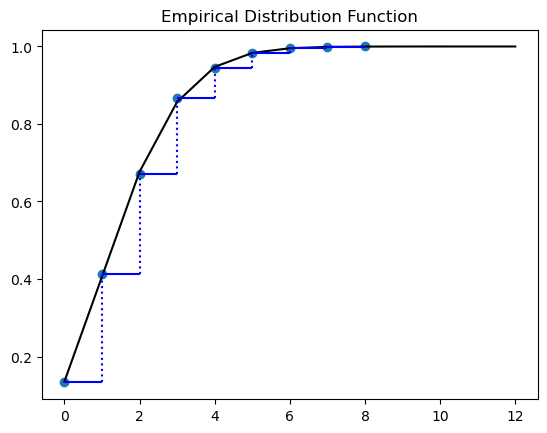

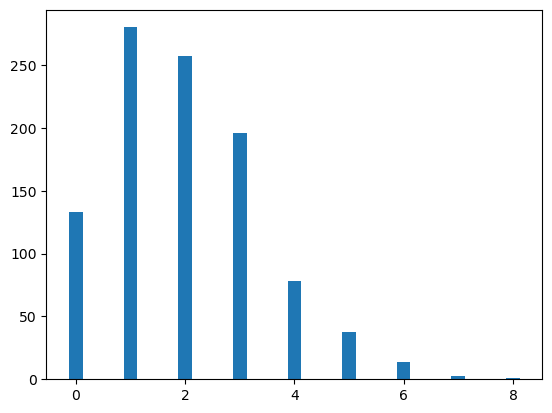

In [144]:
from scipy.special import factorial
poisson_samples = [sample_poisson() for i in range(1000)]
f = []
l = 2
for i in range(13):
    f.append(np.exp(-l)*np.power(l,i)/factorial(i))
F = np.cumsum(f)
plt.plot(F,color='black')
plotEDF(makeEDF(poisson_samples))
discrete_histogram(poisson_samples)